In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [2]:
train_path= "/input/train"
test_path="/input/validation"

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 1400 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [15]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(GaussianNoise(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 128)      

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(patience=3,monitor='val_loss')
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=checkpoint
    )

Epoch 1/10
50/50 [==============================] - 6s 79ms/step - loss: 0.8263 - accuracy: 0.5100 - auc: 0.5011 - precision: 0.5287 - recall: 0.4466 - val_loss: 0.6910 - val_accuracy: 0.5000 - val_auc: 0.7625 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to best_model.h5
Epoch 2/10
50/50 [==============================] - 4s 76ms/step - loss: 0.7222 - accuracy: 0.4300 - auc: 0.4425 - precision: 0.4194 - recall: 0.3939 - val_loss: 0.6926 - val_accuracy: 0.5000 - val_auc: 0.8375 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/10
50/50 [==============================] - 4s 84ms/step - loss: 0.7082 - accuracy: 0.5500 - auc: 0.4911 - precision: 0.4884 - recall: 0.4773 - val_loss: 0.6893 - val_accuracy: 0.5000 - val_auc: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/10
50/50 [=

In [18]:
model.evaluate(train_generator)

350/350 [==============================] - 18s 50ms/step - loss: 0.6931 - accuracy: 0.5300 - auc: 0.5000 - precision: 0.5279 - recall: 0.5686


[0.6931207180023193,
 0.5299999713897705,
 0.5,
 0.5278514623641968,
 0.5685714483261108]

In [19]:
model.evaluate(validation_generator)

20/20 [==============================] - 1s 47ms/step - loss: 0.6924 - accuracy: 0.7875 - auc: 0.5000 - precision: 0.7091 - recall: 0.9750


[0.6924329996109009,
 0.7875000238418579,
 0.5,
 0.7090908885002136,
 0.9750000238418579]

[[0.49854025]]
THE UPLOADED IMAGE IS SUSPECTED AS: Healthy


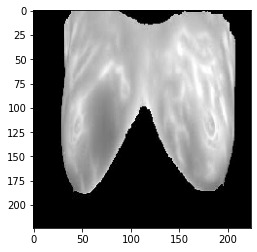

In [32]:
img = image.load_img("../input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_33.jpg",target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Healthy"   
else:
      op="Cancer"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op)) 